# CO<sub>2</sub> Emissions per Vehicle: Simple Linear Regression
## Summary
This analysis uses a dataset provided by the Canadian government that contains model-specific fuel consumption ratings and estimated CO<sub>2</sub> emissions for new light-duty vehicles that were available for retail sale in 2014.
## Importing Libraries and Data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
LR = linear_model.LinearRegression()

from sklearn.metrics import r2_score

In [55]:
df = pd.read_csv(r'C:\Users\tiffa\Documents\GitHub\CO2-emissions-by-vehicle\resources\FuelConsumptionCo2.csv')

In [56]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [89]:
# changing column names from uppercase to lowercase for convenience
df.columns = df.columns.str.lower()

In [58]:
df.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [90]:
# extracting specific columns and assigning to a new dataframe
cdf = df[['enginesize', 'cylinders', 'fuelconsumption_comb', 'co2emissions']]
cdf.head()

,enginesize,cylinders,fuelconsumption_comb,co2emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


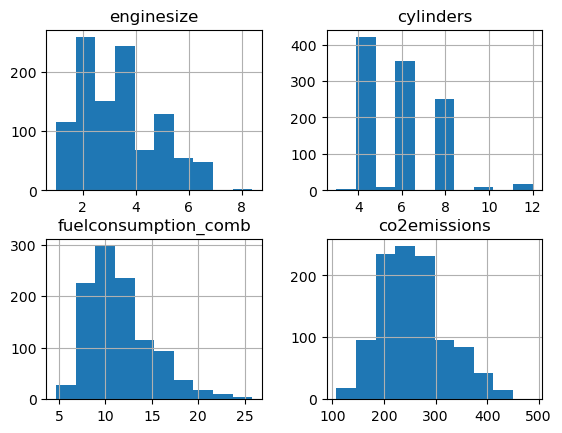

In [88]:
# looking at distributions
cdf.hist()
plt.show()

## Exploring Linear Relationships

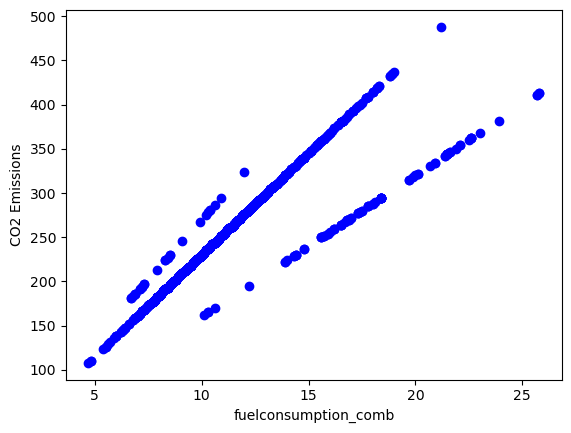

In [61]:
# finding the linear relationship between 'fuelconsumption_comb' and 'co2emissions'
plt.scatter(cdf.fuelconsumption_comb, cdf.co2emissions, color='blue')
plt.xlabel('fuelconsumption_comb')
plt.ylabel('CO2 Emissions')
plt.show()

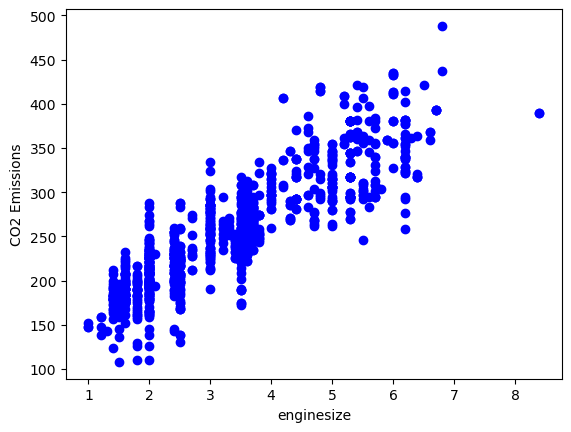

In [62]:
# finding the linear relationship between 'enginesize' and 'co2emissions'
plt.scatter(cdf.enginesize, cdf.co2emissions, color='blue')
plt.xlabel('enginesize')
plt.ylabel('CO2 Emissions')
plt.show()

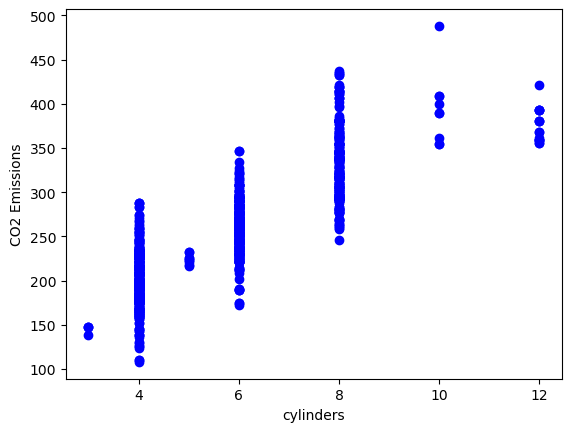

In [63]:
# finding the linear relationship between 'cylinders' and 'co2emissions'
plt.scatter(cdf.cylinders, cdf.co2emissions, color='blue')
plt.xlabel('cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

As we can see, there is a linear relationship for all three attributes as it relates to CO<sub>2</sub> emissions.
### Splitting and Training
Now we'll split the dataset into training and testing sets for our model. We'll split the dataset randomly using np.random.rand() with 80% of the dataset being using for training and 20% for testing. To do this we'll create a mask that account for a random 80% chunk of our dataframe and assign it to a 'train' variable then use the rest for our 'test' variable (20%).

In [64]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

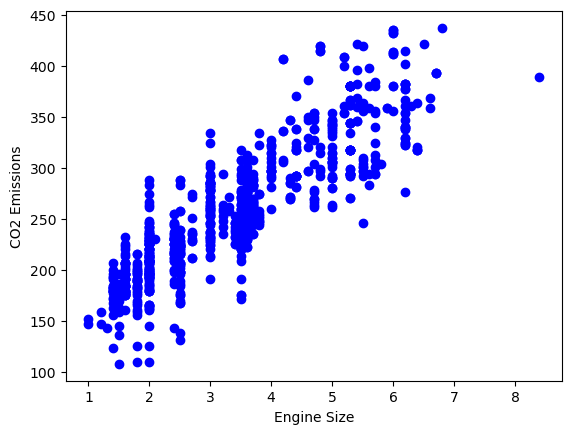

In [65]:
plt.scatter(train.enginesize, train.co2emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Modeling
Next we'll model the data using the 'sci-kit learn' library which I've imported in the first section.

In [66]:
# training the model for the 'enginesize' attribute
train_X = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['co2emissions']])
LR.fit(train_X, train_y)

# printing the coefficients
print(f'Coefficient: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Coefficient: [[39.30168835]]
Intercept: [125.74472878]


Now we'll plot the fit line over the data.

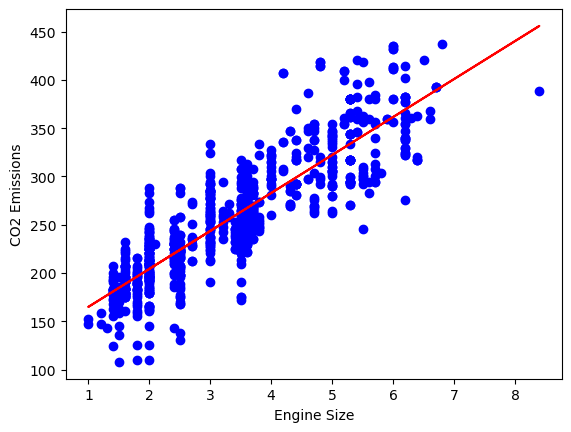

In [67]:
plt.scatter(train.enginesize, train.co2emissions, color='blue')
plt.plot(train_X, LR.coef_[0][0]*train_X + LR.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

Next we'll check our metrics to see how well the model fits the data.

In [74]:
test_X = np.asanyarray(test[['enginesize']])
test_y = np.asanyarray(test[['co2emissions']])
test_y1 = LR.predict(test_X)

print(f'The mean absolute error is: {np.mean(np.absolute(test_y1 - test_y))}')
print(f'The residual sum of squares (MSE) is: {np.mean((test_y1 - test_y)**2)}')
print(f'The r2-score is: {r2_score(test_y, test_y1)}')

The mean absolute error is: 22.33289829078748
The residual sum of squares (MSE) is: 887.9543445557839
The r2-score is: 0.7731741208365301


Now we'll take a look at 'fuelconsumption_comb' and 'co2emissions'.

In [92]:
# taking 'fuelconsumption_comb' from the train dataframe and from the test dataframe (80:20 split)
train_x = train[['fuelconsumption_comb']]
test_x = test[['fuelconsumption_comb']]

In [93]:
# fitting the model
LR.fit(train_x, train_y)

# printing the coefficients
print(f'Coefficient: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')

Coefficient: [[16.16114473]]
Intercept: [69.61439448]


In [77]:
# finding the predictions
predictions = LR.predict(test_x)

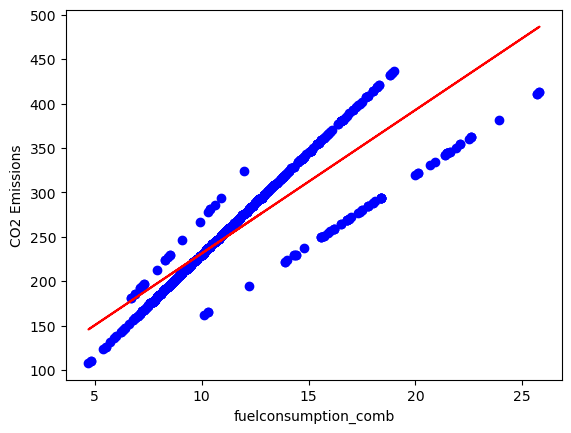

In [94]:
plt.scatter(train.fuelconsumption_comb, train.co2emissions, color='blue')
plt.plot(train_x, LR.coef_[0][0]*train_x + LR.intercept_, '-r')
plt.xlabel('fuelconsumption_comb')
plt.ylabel('CO2 Emissions')
plt.show()

In [84]:
print(f'Mean Absolute Error: {np.mean(np.absolute(predictions - test_y))}')

Mean Absolute Error: 19.873865864470982


While it first glance it may seem like our model performed worse when using the 'fuelconsumption_comb' attribute, when we compare the MAE of the 'enginesize' attribute to the MAE of the 'fuelconsumption_comb' attribute, we see that, using the 'fuelconsumption_comb' attribute contributed to training a more accurate model as seen by its lower MAE.